In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True

insurance = pd.read_csv("insurance.csv")
# insurance.to_csv("Insurance data.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
import scipy
import numpy as np

In [4]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [22]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [23]:
insurance.loc[outliers_iqr(insurance["bmi"])]

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [24]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


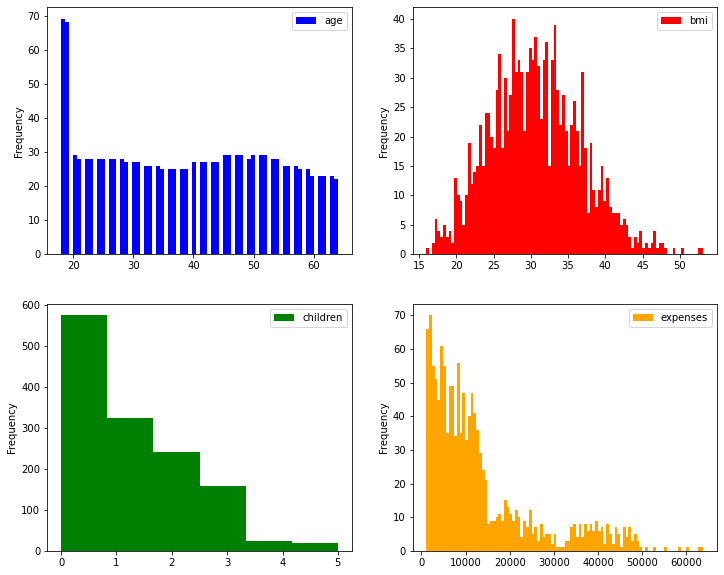

In [25]:
# Data exploration

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=100, color="orange", ax=axes[1][1])
plt.show()

In [26]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


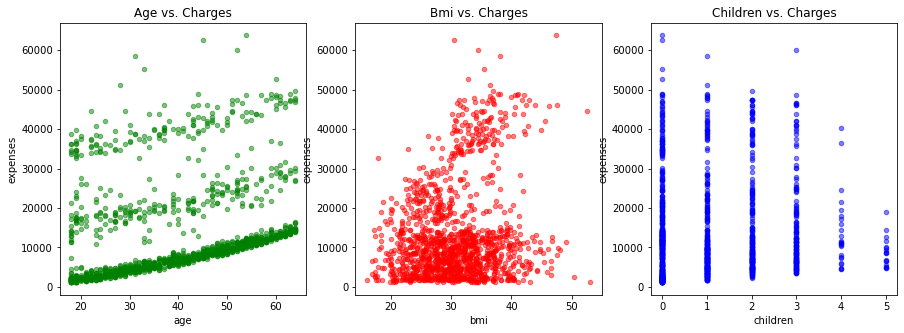

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

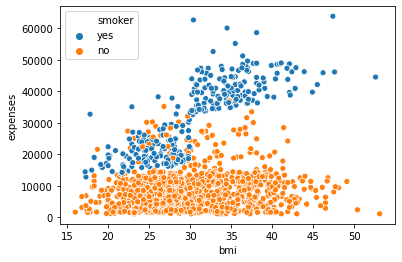

In [7]:
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="expenses", data=insurance, hue='smoker')

Text(0.5, 1.0, 'Smokers')

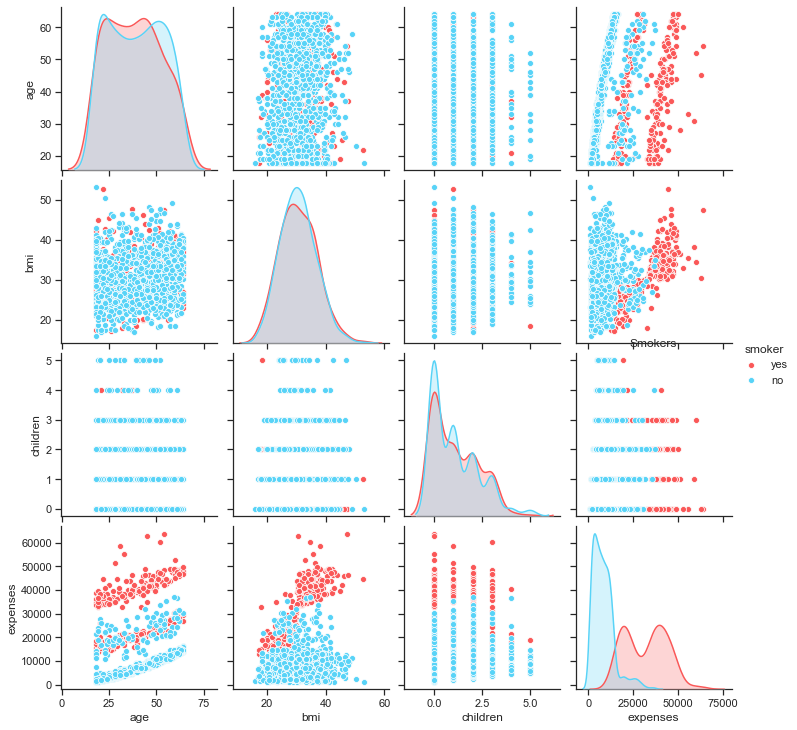

In [29]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

In [30]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [32]:
insurance.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [33]:
# Label or integer encoding is possible 

#insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
#insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

#insurance.head()

In [34]:
# One hot encoding

cat_col=['smoker','region','sex']
num_col=[i for i in insurance.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [35]:
one_hot=pd.get_dummies(insurance[cat_col])
insurance=pd.concat([insurance[num_col],one_hot],axis=1)
insurance.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [36]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses

In [37]:
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [38]:
# Normalising the data is also an option

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [41]:
x_train_poly.shape

(1070, 78)

In [67]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=4, random_state=13)

In [69]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [71]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="rbf", C=1000 )  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto')

In [45]:
# Importing evaluation metrics

from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [46]:
## Accuracy with vanilla multiple linear regression

# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.47853008120571827
Testing Accuracy for Multiple Linear Regression Model:  -0.3300569682649874
RMSE for Training Data:  14559.229579026976
RMSE for Testing Data:  14548.261617299797
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7476018110609117


In [47]:
## Checking accuracy with Linear model with polynomial features

# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8365938058485178
Testing Accuracy for Polynomial Regression Model:  0.8819113352628174
RMSE for Training Data:  4840.136051866241
RMSE for Testing Data:  4334.9100157671255
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.837911847204938


In [68]:
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.857987286659203
Testing Accuracy for Decision Tree Regression Model:  0.8802320436057114
RMSE for Training Data:  4512.185281427831
RMSE for Testing Data:  4365.62371992602
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8508236806420276


In [70]:
## Checking accuracy with vanilla Random forests

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8831275238406227
Testing Accuracy for Random Forest Regression Model:  0.8952529450752874
RMSE for Training Data:  4093.355224028489
RMSE for Testing Data:  4082.6945721675384
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8589831370501735


In [72]:
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Support Vector Regression Model:  0.7454688597040091
Testing Accuracy for Support Vector Regression Model:  0.7775422874862461
RMSE for Training Data:  6040.790488928649
RMSE for Testing Data:  5949.763655047545


In [52]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, "NA"]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=4", "n_estimators=500, max_depth=4", "kernel=”rbf”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.478530,-0.330057,14559.229579,14548.261617,0.747602
Polynomial Regression,fit_intercept=False,0.836594,0.881911,4840.136052,4334.910016,0.837912
Decision Tree Regression,max_depth=4,0.857987,0.880232,4512.185281,4365.623720,0.850824
Random Forest Regression,"n_estimators=500, max_depth=4",0.867515,0.896975,4358.193964,4049.000337,0.858738
Support Vector Regression,"kernel=”rbf”, C=1000",0.841712,0.883920,4763.733236,4297.882827,NA


In [53]:
## Hyperparameter tuning in Decision trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeRegressor(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeRegressor(**best_params)
tree_clf.fit(X_train, y_train)

## Checking accuracy with Tuned RFs## Checking accuracy with Tuned RFs

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


Best paramters: {'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 6068 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 6498 out of 6498 | elapsed:    5.1s finished


DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

In [54]:
## Checking accuracy with Tuned DTs

# Prediction with training dataset:
y_pred_DTR_train = tree_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = tree_clf.predict(X_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(tree_clf, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)



RMSE for Training Data:  4529.070945145781
RMSE for Testing Data:  4157.192767136226
Training Accuracy for Decision Tree Regression Model:  0.8569224075936374
Testing Accuracy for Decision Tree Regression Model:  0.8913953640004728
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8519152489746703


In [55]:
## Hyperparameter tuning in Random forests

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth} #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=2,n_jobs = -1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestRegressor(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.6s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.5s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.5s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  

[CV]  max_depth=4, max_features=auto, n_estimators=1500, total=   2.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.6s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.6s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.5s
[CV] max_depth=4, max_features=sqrt, n_estimators=1000 ...............
[CV]  

[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.6s
[CV] max_depth=6, max_features=sqrt, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.6s
[CV] max_depth=6, max_features=sqrt, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............
[CV]  max_depth=None, max_features=auto, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, n_estimators=500 ............

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  2.5min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1500}


RandomForestRegressor(max_depth=4, n_estimators=1500)

In [56]:
## Checking accuracy with Tuned RFs

# Prediction with training dataset:
y_pred_RFR_train = rf_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_clf.predict(X_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)


RMSE for Training Data:  4357.51222289681
RMSE for Testing Data:  4045.623889679928


In [57]:
## Hyper parameter tuning the SVM

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000,10000,100000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5, iid=True,n_jobs = -1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVR(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.3min finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best params: {'C': 100000, 'gamma': 0.01, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.01)

In [58]:
## Checking accuracy with Tuned SVMs

# Prediction with training dataset:
y_pred_SVR_train = svm_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svm_clf.predict(X_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)


RMSE for Training Data:  5050.055703900807
RMSE for Testing Data:  4444.054683484023


In [59]:
# XGBoost with parameter tuning

import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [60]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           verbose = 1,
                           n_jobs = -1
                          )

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [61]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.4min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [62]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb1 = xgb_model.predict(X_train)


rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb1 = sqrt(mean_squared_error(y_train, y_pred_xgb1))


print("RMSE Training data:", rmse_xgb1)
print("RMSE Testing data:", rmse_xgb)

RMSE Training data: 4330.116497539195
RMSE Testing data: 4035.226036463745
